# Sklearn, XGBoost

## sklearn.ensemble.RandomForestClassifier

In [1]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb

import matplotlib.pyplot as plt

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [2]:
bioresponse = pd.read_csv('bioresponse.csv')

In [3]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = bioresponse.drop('Activity', axis=1)
y = bioresponse['Activity'].values

### Модель RandomForestClassifier

#### Зависимость качества от количества деревьев

In [6]:
n_trees = [1, *range(10, 55, 5)]

In [8]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring='accuracy', cv=3, n_jobs=-1)    
    scoring.append(score)
    
scoring = np.asmatrix(scoring)

Wall time: 11.4 s


In [9]:
scoring

matrix([[0.66906475, 0.668     , 0.6704    ],
        [0.75859313, 0.7592    , 0.7504    ],
        [0.78097522, 0.7616    , 0.7592    ],
        [0.78417266, 0.7736    , 0.7648    ],
        [0.78257394, 0.7736    , 0.7704    ],
        [0.78816946, 0.7752    , 0.7736    ],
        [0.78816946, 0.7856    , 0.7776    ],
        [0.78896882, 0.78      , 0.7832    ],
        [0.78976819, 0.7856    , 0.7896    ],
        [0.79536371, 0.7816    , 0.7928    ]])

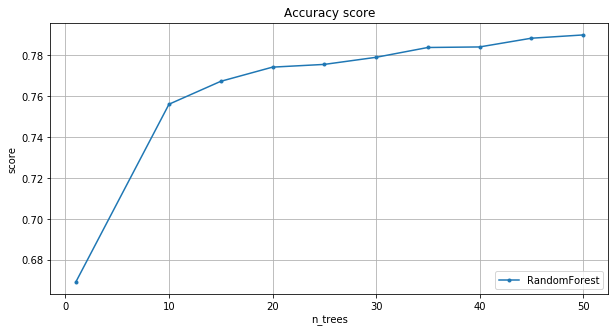

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
plt.grid(True)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Accuracy score')
plt.legend(loc='lower right')
plt.show()

#### Кривые обучения для деревьев большей глубины

In [20]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring='accuracy', cv=3, n_jobs=-1)    
    xgb_scoring.append(score)

xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 1min 20s


In [22]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

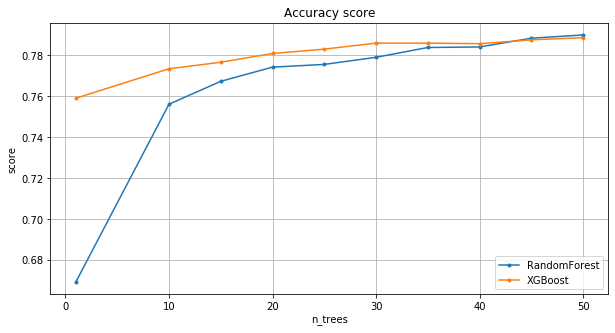

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
plt.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBoost')
plt.grid(True)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Accuracy score')
plt.legend(loc='lower right')
plt.show()

#### **Если Вас заинтересовал xgboost:**
python api: http://xgboost.readthedocs.org/en/latest/python/python_api.html

установка: http://xgboost.readthedocs.io/en/latest/build.html